In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [4]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
print(X_train.shape[0])
print(X_test.shape[0])
print(y_train.shape[0])
print(y_test.shape[0])

60000
10000
60000
10000


In [44]:
from tensorflow.examples.tutorials.mnist import input_data
mnist2 = input_data.read_data_sets('./mnist/data/', one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [46]:
print(type(mnist2.train))
print(type(mnist2.train.images),type(mnist2.test.images))
print(type(mnist2.train.labels),type(mnist2.test.labels))

<class 'tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [14]:
import numpy as np
import pandas as pd

In [48]:
print(mnist2.train.images.shape, mnist2.test.images.shape,
     mnist2.validation.images.shape)


(55000, 784) (10000, 784) (5000, 784)


In [19]:
!pip install keras

In [20]:
from keras.datasets import mnist

Using TensorFlow backend.


In [21]:
((X_train, y_train), (X_test, y_test)) = mnist.load_data()
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [22]:
import matplotlib.pyplot as plt



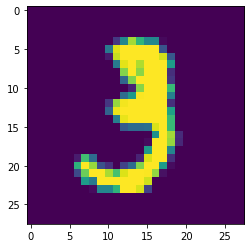

In [23]:
plt.figure()
plt.imshow(X_train[10])
plt.show()

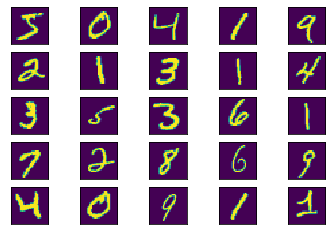

In [24]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i])
plt.show()

In [25]:
print(X_train.shape)
X_train = X_train.reshape(60000, 28*28)
print(X_train.shape)

(60000, 28, 28)
(60000, 784)


In [26]:
print(X_test.shape)
X_test = X_test.reshape(10000, 28*28)
print(X_test.shape)


(10000, 28, 28)
(10000, 784)


In [27]:
print(y_train.shape)
y_train_hot = np.eye(10)[y_train]
print(y_train_hot.shape)

(60000,)
(60000, 10)


In [28]:
print(y_test.shape)
y_test_hot = np.eye(10)[y_test]
print(y_test_hot.shape)

(10000,)
(10000, 10)


In [31]:
!pip install os

  ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [49]:
import tensorflow as tf

In [50]:
import os, warnings
# 경고 메시지 무시하거나 숨길때(ignore), 다시보이게(default)
# warnings.filterwarnings(action='default')
warnings.filterwarnings(action='ignore')

In [51]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


In [52]:
# 데이터의 개수
print(mnist.test.num_examples, mnist.train.num_examples, mnist.validation.num_examples)
# 데이터의 행열 사이즈
print(mnist.train.labels.shape, mnist.train.images.shape)
print(mnist.test.labels.shape, mnist.test.images.shape)
print(mnist.validation.labels.shape, mnist.validation.images.shape)

10000 55000 5000
(55000, 10) (55000, 784)
(10000, 10) (10000, 784)
(5000, 10) (5000, 784)


In [53]:
# 입력층 - 784개 노드
# 은닉층(3개층) - 64노드
# 출력층(범주10개) - 10노드

In [54]:
X = tf.placeholder(tf.float32, [None, 784])
Y = tf.placeholder(tf.float32, [None, 10])

In [55]:
W1 = tf.Variable(tf.random_normal([784, 64], stddev=0.01))
L1 = tf.nn.relu(tf.matmul(X, W1)) 

W2 = tf.Variable(tf.random_normal([64, 64], stddev=0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))

W3 = tf.Variable(tf.random_normal([64, 64], stddev=0.01))
L3 = tf.nn.relu(tf.matmul(L2, W3))

W4 = tf.Variable(tf.random_normal([64, 10], stddev=0.01))
model = tf.nn.relu(tf.matmul(L3, W4))

print(model)

Tensor("Relu_7:0", shape=(?, 10), dtype=float32)


In [56]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=model,
                                                                labels=Y))

In [57]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

In [58]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [62]:
# total_cost = 0
for j in range(30):
    total_cost = 0
    for i in range(600):
        batch_xs, batch_ys = mnist.train.next_batch(100)
        _, cost_val = sess.run([optimizer, cost], feed_dict={X:batch_xs, Y:batch_ys})
        # 총 loss의 계산 - 60번 돌아가면서 발생된 cost
        total_cost = total_cost + cost_val
    print('{} Epoch 평균 Cost : {:.3f}'.format(j, total_cost/600))

0 Epoch 평균 Cost : 0.555
1 Epoch 평균 Cost : 0.543
2 Epoch 평균 Cost : 0.537
3 Epoch 평균 Cost : 0.529
4 Epoch 평균 Cost : 0.524
5 Epoch 평균 Cost : 0.518
6 Epoch 평균 Cost : 0.517
7 Epoch 평균 Cost : 0.508
8 Epoch 평균 Cost : 0.512
9 Epoch 평균 Cost : 0.506
10 Epoch 평균 Cost : 0.501
11 Epoch 평균 Cost : 0.503
12 Epoch 평균 Cost : 0.497
13 Epoch 평균 Cost : 0.501
14 Epoch 평균 Cost : 0.494
15 Epoch 평균 Cost : 0.496
16 Epoch 평균 Cost : 0.496
17 Epoch 평균 Cost : 0.492
18 Epoch 평균 Cost : 0.490
19 Epoch 평균 Cost : 0.496
20 Epoch 평균 Cost : 0.491
21 Epoch 평균 Cost : 0.488
22 Epoch 평균 Cost : 0.488
23 Epoch 평균 Cost : 0.490
24 Epoch 평균 Cost : 0.488
25 Epoch 평균 Cost : 0.491
26 Epoch 평균 Cost : 0.485
27 Epoch 평균 Cost : 0.485
28 Epoch 평균 Cost : 0.486
29 Epoch 평균 Cost : 0.481
